In [64]:
import pandas as pd

# Define the absolute path to your Excel file using a raw string
excel_file_path = r'C:\Users\Kaliyugavaratharajan\OneDrive\Desktop\Andhra.xlsx'

# Read the Excel file
excel_data = pd.ExcelFile(excel_file_path)

# List to hold DataFrames for each sheet
dfs = []

# Loop through each sheet and read it into a DataFrame
for sheet_name in excel_data.sheet_names:
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    df['SheetName'] = sheet_name  # Add a column to identify the sheet name
    dfs.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Define the path for the output CSV file using a raw string
csv_file_path = r'C:\Users\Kaliyugavaratharajan\OneDrive\Desktop\election.csv'

# Save the combined DataFrame to a CSV file
combined_df.to_csv(csv_file_path, index=False)

print("Excel sheets combined and saved to CSV successfully.")


Excel sheets combined and saved to CSV successfully.


In [65]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = r'C:\Users\Kaliyugavaratharajan\OneDrive\Desktop\election.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with 'df', which contains the data from your CSV file
print(df.head())  # Example: Print the first few rows to verify


  Constituency  Const. No.           Leading Candidate  \
0      Achanta        56.0       SATYANARAYANA PITHANI   
1      Addanki       105.0        GOTTIPATI RAVI KUMAR   
2        Adoni       146.0  DR. PARTHA SARATHI VALMIKI   
3    Allagadda       134.0          AKHILA PRIYA BHUMA   
4         Alur       147.0               B. VIRUPAKSHI   

                           Leading Party  Leading In  Won In  Trailing In  \
0                           Telugu Desam         0.0   135.0          0.0   
1                           Telugu Desam         0.0   135.0          0.0   
2                 Bharatiya Janata Party         0.0     8.0          0.0   
3                           Telugu Desam         0.0   135.0          0.0   
4  Yuvajana Sramika Rythu Congress Party         0.0    11.0          0.0   

                Trailing Candidate                         Trailing Party  \
0  CHERUKUVADA SRI RANGANADHA RAJU  Yuvajana Sramika Rythu Congress Party   
1         CHINNA HANIMIREDDY PANEM

In [66]:
print(df)


    Constituency  Const. No.           Leading Candidate  \
0        Achanta        56.0       SATYANARAYANA PITHANI   
1        Addanki       105.0        GOTTIPATI RAVI KUMAR   
2          Adoni       146.0  DR. PARTHA SARATHI VALMIKI   
3      Allagadda       134.0          AKHILA PRIYA BHUMA   
4           Alur       147.0               B. VIRUPAKSHI   
..           ...         ...                         ...   
590          NaN         NaN                         NaN   
591          NaN         NaN                         NaN   
592          NaN         NaN                         NaN   
593          NaN         NaN                         NaN   
594          NaN         NaN                         NaN   

                             Leading Party  Leading In  Won In  Trailing In  \
0                             Telugu Desam         0.0   135.0          0.0   
1                             Telugu Desam         0.0   135.0          0.0   
2                   Bharatiya Janata Party

In [67]:
party_wins = df['Leading Party'].value_counts()
print(party_wins)

Leading Party
Telugu Desam                             135
Bharatiya Janata Party                   132
Biju Janata Dal                           51
Sikkim Krantikari Morcha                  31
Janasena Party                            21
Indian National Congress                  15
Yuvajana Sramika Rythu Congress Party     11
Independent                                6
National People's Party                    5
Nationalist Congress Party                 3
People's Party of Arunachal                2
Communist Party of India (Marxist)         1
Sikkim Democratic Front                    1
Name: count, dtype: int64


In [68]:
leading_party = party_wins.idxmax()
leading_party_wins = party_wins.max()
print(party_wins.idxmax(), leading_party_wins)

Telugu Desam 135


In [69]:
#candidates who have won the most seats
top_candidates = df['Leading Candidate'].value_counts().head(10)
print(top_candidates)

Leading Candidate
P S TAMANG               2
SATYANARAYANA PITHANI    1
NARASINGA MADKAMI        1
BARSHA SINGH BARIHA      1
RAJENDRA DHOLAKIA        1
PRAVATI PARIDA           1
SANTOSH KHATUA           1
CHHABI MALIK             1
ARUNA KUMAR SAHOO        1
MANORAMA MOHANTY         1
Name: count, dtype: int64


In [70]:
total_votes = df['Total Votes'].sum()
df['Percentage of Total Votes'] = (df['Total Votes'] / total_votes) * 100
print(df[['Leading Party', 'Percentage of Total Votes']])

                             Leading Party  Percentage of Total Votes
0                             Telugu Desam                        NaN
1                             Telugu Desam                        NaN
2                   Bharatiya Janata Party                        NaN
3                             Telugu Desam                        NaN
4    Yuvajana Sramika Rythu Congress Party                        NaN
..                                     ...                        ...
590                                    NaN                   0.011391
591                                    NaN                   0.006223
592                                    NaN                   0.015142
593                                    NaN                   0.011891
594                                    NaN                   0.046621

[595 rows x 2 columns]


In [71]:
constituency_analysis = df.groupby(['Constituency', 'Leading Party'])['Leading Candidate'].first()
print(constituency_analysis)


Constituency          Leading Party                        
ARITHANG              Sikkim Krantikari Morcha                          ARUN KUMAR UPRETI
Achanta               Telugu Desam                                  SATYANARAYANA PITHANI
Addanki               Telugu Desam                                   GOTTIPATI RAVI KUMAR
Adoni                 Bharatiya Janata Party                   DR. PARTHA SARATHI VALMIKI
Allagadda             Telugu Desam                                     AKHILA PRIYA BHUMA
                                                                          ...            
Yachuli               Nationalist Congress Party                              TOKO TATUNG
Yelamanchili          Janasena Party                                SUNDARAPU VIJAY KUMAR
Yemmiganur            Telugu Desam                                 B. JAYANAGESWARA REDDY
Yerragondapalem (SC)  Yuvajana Sramika Rythu Congress Party     CHANDRA SEKHAR TATIPARTHI
Ziro-Hapoli           Bharatiya Janata P

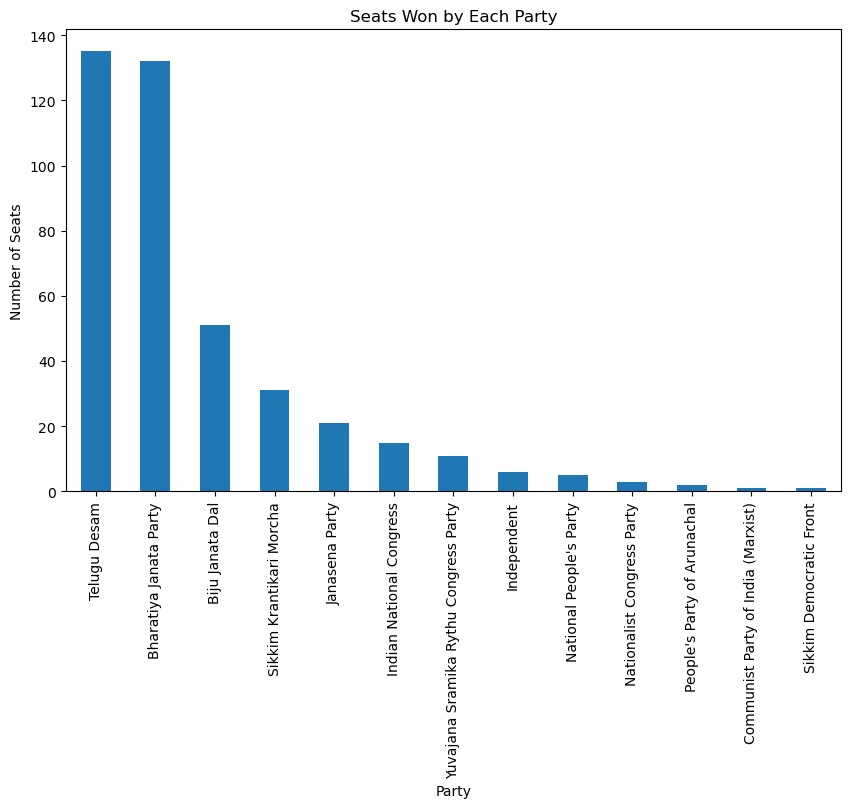

In [72]:
import matplotlib.pyplot as plt

party_wins.plot(kind='bar', figsize=(10, 6))
plt.title('Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.show()


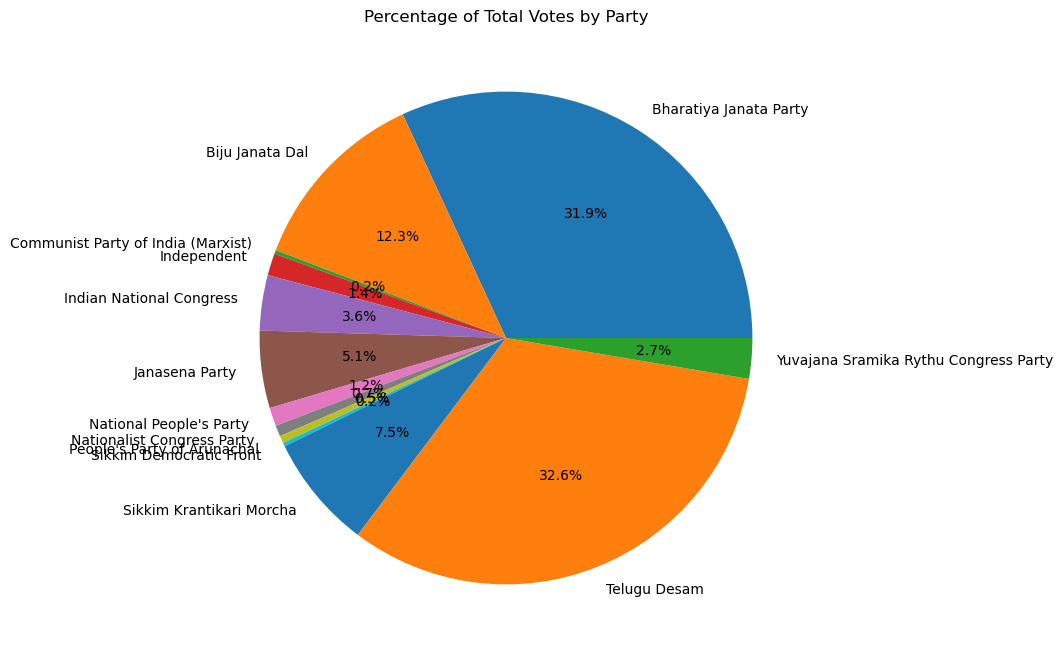

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with corrected lengths
data = {
    'Leading Party': [
        'Telugu Desam',
        'Bharatiya Janata Party',
        'Biju Janata Dal',
        'Sikkim Krantikari Morcha',
        'Janasena Party',
        'Indian National Congress',
        'Yuvajana Sramika Rythu Congress Party',
        'Independent',
        'National People\'s Party',  # Corrected with escape for apostrophe
        'Nationalist Congress Party',
        'People\'s Party of Arunachal',  # Corrected with escape for apostrophe
        'Communist Party of India (Marxist)',
        'Sikkim Democratic Front'
    ],
    'Total Votes': [
        135, 132, 51, 31, 21, 15, 11, 6, 5, 3, 2, 1, 1
    ]
}

df = pd.DataFrame(data)

# Group by 'Leading Party' and sum 'Total Votes'
party_votes = df.groupby('Leading Party')['Total Votes'].sum()

# Plotting a pie chart
party_votes.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Total Votes by Party')
plt.ylabel('')  # Remove y-axis label
plt.show()


In [74]:
print(df.columns)

Index(['Leading Party', 'Total Votes'], dtype='object')


In [75]:
print(df.head())


              Leading Party  Total Votes
0              Telugu Desam          135
1    Bharatiya Janata Party          132
2           Biju Janata Dal           51
3  Sikkim Krantikari Morcha           31
4            Janasena Party           21


In [77]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())

# Fill NaN values with a specific value (e.g., 0)
df_filled = df.fillna(0)


Leading Party    0
Total Votes      0
dtype: int64


In [78]:
party_wins = df['Leading Party'].value_counts()
print("\nParty Performance Analysis - Wins by Party:")
print(party_wins)


Party Performance Analysis - Wins by Party:
Leading Party
Telugu Desam                             1
Bharatiya Janata Party                   1
Biju Janata Dal                          1
Sikkim Krantikari Morcha                 1
Janasena Party                           1
Indian National Congress                 1
Yuvajana Sramika Rythu Congress Party    1
Independent                              1
National People's Party                  1
Nationalist Congress Party               1
People's Party of Arunachal              1
Communist Party of India (Marxist)       1
Sikkim Democratic Front                  1
Name: count, dtype: int64
